<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/master/parquet_pandas_stonewall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Archives Unleashed Parquet Derivatives

In this notebook, we'll setup an environment, then download a dataset of web archive collection derivatives that were produced with the [Archives Unleashed Toolkit](https://github.com/archivesunleashed/aut/). These derivatives are in the [Apache Parquet](https://parquet.apache.org/) format, which is a [columnar storage](http://en.wikipedia.org/wiki/Column-oriented_DBMS) format. These derivatives are generally small enough to work with on your local machine, and can be easily converted to Pandas DataFrames as demonstrated below.

This notebook is useful for exploring the following derivatives. 

**[Binary Analysis](https://github.com/archivesunleashed/aut-docs/blob/master/current/binary-analysis.md#binary-analysis)**
- [Audio](https://github.com/archivesunleashed/aut-docs/blob/master/current/binary-analysis.md#extract-audio-information)
- [Images](https://github.com/archivesunleashed/aut-docs/blob/master/current/binary-analysis.md#extract-image-information)
- [PDFs](https://github.com/archivesunleashed/aut-docs/blob/master/current/binary-analysis.md#extract-pdf-information)
- [Presentation program files](https://github.com/archivesunleashed/aut-docs/blob/master/current/binary-analysis.md#extract-presentation-program-files-information)
- [Spreadsheets](https://github.com/archivesunleashed/aut-docs/blob/master/current/binary-analysis.md#extract-spreadsheet-information)
- [Text files](https://github.com/archivesunleashed/aut-docs/blob/master/current/binary-analysis.md#extract-text-files-information)
- [Word processor files](https://github.com/archivesunleashed/aut-docs/blob/master/current/binary-analysis.md#extract-word-processor-files-information)

**Web Pages**

`.webpages().select($"crawl_date", $"url", $"mime_type_web_server", $"mime_type_tika", RemoveHTMLDF(RemoveHTTPHeaderDF(($"content"))).alias("content"))` 

Produces a DataFrame with the following columns:
  - `crawl_date`
  - `url`
  - `mime_type_web_server`
  - `mime_type_tika`
  - `content`

As the `webpages` derivative is especially rich - it contains the full text of all webpages - we have a separate notebook for [text analysis](https://github.com/archivesunleashed/notebooks/blob/master/parquet_text_analyis.ipynb) here.

**Web Graph**

`.webgraph()` 

Produces a DataFrame with the following columns:
  - `crawl_date`
  - `src`
  - `dest`
  - `anchor`

**Image Links**

`.imageLinks()`

Produces a DataFrame with the following columns:
  - `src`
  - `image_url`

**Domains**

`.webpages().groupBy(ExtractDomainDF($"url").alias("url")).count().sort($"count".desc)`

Produces a DataFrame with the following columns:
- domain
- count

We recommend running through the notebook with the provided sample dataset. You may then want to substitute it with your own dataset.

# Dataset

Web archive derivatives of the [Stonewall 50 Commemoration collection](https://archive-it.org/collections/12143) from [Columbia University Libraries](https://archive-it.org/home/Columbia). The derivatives were created with the [Archives Unleashed Toolkit](https://github.com/archivesunleashed/aut/) and [Archives Unleashed Cloud](https://cloud.archivesunleashed.org/).


[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.3631347.svg)](https://doi.org/10.5281/zenodo.3631347)


Curious about the size the derivative Parquet output compared to the size of the web archive collection?

The total size of all 11 Parquet deriatives is 2.2G, with `webpages` being the largest (1.5G) since it has a column with full text (`content`).

```
16K     parquet/presentation-program-files
1.5G    parquet/webpages
16K     parquet/spreadsheet
784K    parquet/pdf
24K     parquet/word-processor
2.4M    parquet/text-files
105M    parquet/image
180M    parquet/imagelinks
1.7M    parquet/audio
433M    parquet/webgraph
308K    parquet/domains
2.2G    parquet/
```

The total size of the web archive collection is 128G.

The following command downloads all of the parquets file from the Zenodo data repository. To run a 'cell,' you can click the play button next to the cell or you can press your shift key and enter key at the same time.

Whenever you see code snippets like this, you should do the same thing to run it.


In [0]:
%%capture

!curl -L "https://zenodo.org/record/3631347/files/cul-12143-parquet.tar.gz?download=1" > cul-12143-parquet.tar.gz
!tar -xzf cul-12143-parquet.tar.gz

The following command provides a list of all the downloaded parquet files. You should see a list of all the different derivatives here - note that they line up with the list provided at the beginning of this notebook.


In [2]:
!ls -1 parquet

audio
domains
image
imagelinks
pdf
presentation-program-files
spreadsheet
text-files
webgraph
webpages
word-processor


# Environment

Next, we'll setup our environment so we can work with the Parquet output with [Pandas](https://pandas.pydata.org).

In [0]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

# Loading our Archives Unleashed Datasets as DataFrames

Next, we'll load up our datasets to work with and show a preview of each. We'll load the network, domains, web graph, and images. 

The remainder of the binary datasets (audio, video, spreadsheets, etc.) will all follow the same pattern as the images dataset, except that they do not have the height and width columns. A useful exercise when trying to learn how to use this would be to swap out images for audio, for example, and see how you can explore these other file types.

We've provided a [separate notebook](https://github.com/archivesunleashed/notebooks/blob/master/parquet_text_analyis.ipynb) to work with the pages dataset  because it tends to be resource intensive.


## Images

The following commands create a variable called `images` that contain a DataFrame with all of the image information from the web archive. 

**Reminder:** If you want to look at a differnt derivative, you can, for instance, replace out `images` for `audio`.

In [5]:
images_parquet = pq.read_table('parquet/image')
images = images_parquet.to_pandas()
images

,url,filename,extension,mime_type_web_server,mime_type_tika,width,height,md5
0,https://upload.wikimedia.org/wikipedia/commons...,250px-VirusTotal_Logo.svg.png,png,image/png,image/png,250,50,ffffc3d4dd0d5ca5cfd20066bf9be493
1,https://upload.wikimedia.org/wikipedia/commons...,60px-US-O3_insignia.svg.png,png,image/png,image/png,60,56,ffffba9c242928a6a907ea23577d41a0
2,https://bestgaynewyork.com/wp-content/uploads/...,world-pride-nyc-2019-stonewall-300x151.jpg,jpg,image/jpeg,image/jpeg,300,151,ffff454c66b8f105bd12e4e12229a34b
3,"https://maps.wikimedia.org/img/osm-intl,6,40.9...","osm-intl,6,40.94,-72.68,300x200.png",png,image/png,image/png,300,200,ffff4411332dc5fd4bdb1992108e60ac
4,https://upload.wikimedia.org/wikipedia/commons...,220px-OldPostOfficeTomahWI.JPG,jpg,image/jpeg,image/jpeg,220,157,fffeebdfd9e8f1fe21fbfcc09c244fc4
...,...,...,...,...,...,...,...,...
311981,https://upload.wikimedia.org/wikipedia/commons...,48px-KlingonLang_w.svg.png,png,image/png,image/png,48,62,0000d77176fc96d19a215b55d27b65a0
311982,https://assets.vogue.com/photos/587736c14188c6...,sung-hee-kim-lais-ribeiro.jpg,jpg,image/jpeg,image/jpeg,2000,2582,000089ae142fd57e91b20e32f0010b5e
311983,https://planettransgender.com/wp-content/uploa...,apple-touch-icon-144x144.png,png,image/png,image/png,144,144,00006084a583f54c83a659b1d83332e8
311984,https://upload.wikimedia.org/wikipedia/commons...,50px-UA_shoulder_mark_10.svg.png,png,image/png,image/png,50,135,000035e22329b97c663aaaf40ae7b6bd


## Web Graph

The next data that we will explore will be the "web graph." This is a DataFrame containing all the hyperlinks within a collection - from `src` (or the page that _contains_ the link) to `dest` (or the page that the link is linking _to_). It also includes the date when this link was crawled, as well as the `anchor` text (what the user clicks on to visit).

In [6]:
webgraph_parquet = pq.read_table('parquet/webgraph')
webgraph = webgraph_parquet.to_pandas()
webgraph

,crawl_date,src,dest,anchor
0,20190708,https://www.youtube.com/watch?v=4MSelbHNTK8&fe...,https://www.google.com/intl/en/policies/privacy/,Privacy
1,20190708,https://www.youtube.com/watch?v=4MSelbHNTK8&fe...,https://www.google.com/support/legal/answer/31...,Legal Help page
2,20190708,https://accounts.google.com/ServiceLogin?uilel...,https://support.google.com/chrome/answer/61307...,Learn more
3,20190708,https://accounts.google.com/ServiceLogin?uilel...,https://support.google.com/accounts?hl=en,Help
4,20190708,https://accounts.google.com/ServiceLogin?uilel...,https://accounts.google.com/TOS?loc=US&hl=en&p...,Privacy
...,...,...,...,...
17518076,20190603,https://timessquares.nyc/stonewall50/search/%7...,https://grsquares.org/,Grand River Squares (MI)
17518077,20190603,https://timessquares.nyc/stonewall50/search/%7...,http://iagsdc.com/ottawa/,Ottawa Date Squares (Canada)
17518078,20190603,https://timessquares.nyc/stonewall50/search/%7...,https://puddletownsquares.org/,Puddletown Squares (WA)
17518079,20190603,https://timessquares.nyc/stonewall50/search/%7...,http://www.chesapeakesquares.org/,Chesapeake Squares (MD)


## Domains

This derivative contains basic information about what's been collected in the crawl. Specifically we can analyze how often pages from each domain appear.

In [7]:
domains_parquet = pq.read_table('parquet/domains')
domains = domains_parquet.to_pandas()
domains

,url,count
0,www.nationalqueertheater.org,119016
1,www.stonewallchorale.org,118697
2,en.wikipedia.org,103231
3,accounts.google.com,55555
4,mobile.twitter.com,29955
...,...,...
3267,innonmainmanasquan.com,1
3268,nj.us.williamhill.com,1
3269,ld-linux.so,1
3270,conradhotels3.hilton.com,1


# Data Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

## Counting total files, and unique files



#### Count number of rows (how many images are in the web archive collection).


In [8]:
images.count()

url                     311986
filename                311986
extension               311986
mime_type_web_server    311986
mime_type_tika          311986
width                   311986
height                  311986
md5                     311986
dtype: int64

 #### How many unique images are in the collection?

 We can see if an image is unique or not by computing an [MD5 hash](https://en.wikipedia.org/wiki/MD5#MD5_hashes) of it. The exact same image might be called `example.jpg` and `foo.jpg` - by computing the hash, we can see that even with different file names, they are actually the same image!




In [9]:
len(images.md5.unique())

309886

#### What are the top 10 most occurring images in the collection?

Here we discover which image (or images) occur most frequently. 

In [10]:
images['md5'].value_counts().head(10)

b798f4ce7359fd815df4bdf76503b295    84
d89746888da2d9510b64a9f031eaecd5    61
28d6814f309ea289f847c69cf91194c6    41
b4491705564909da7f9eaf749dbbfbb1    24
55d25e9dc950d5db4d53a3b195c046c6    19
55108a6986058133800679a12521b280     9
c4a2b870062c2bb98c500bc1526c0498     6
6851dbf491ae442da3314f19e8aff085     6
2bc8930b2b073552d8954d9f84058245     5
8d006199d0a06f11383c76eb7d35c317     5
Name: md5, dtype: int64


#### What's the information around all of the occurances of `b798f4ce7359fd815df4bdf76503b295`?

What, you mean you don't know what `b798f4ce7359fd815df4bdf76503b295` means? Let's find those images in the DataFrame table - we can here see the real file name (`erosion.jpg`) and more importantly, its URL within the web archive.


In [11]:
images.loc[images['md5'] == 'b798f4ce7359fd815df4bdf76503b295']

,url,filename,extension,mime_type_web_server,mime_type_tika,width,height,md5
88226,https://www.facebook.com/tr?id=735575706641503...,tr,gif,image/gif,image/gif,1,1,b798f4ce7359fd815df4bdf76503b295
88227,https://www.facebook.com/tr/?id=33531913663388...,,gif,image/gif,image/gif,1,1,b798f4ce7359fd815df4bdf76503b295
88228,https://www.facebook.com/tr/?id=39855345091085...,,gif,image/gif,image/gif,1,1,b798f4ce7359fd815df4bdf76503b295
88229,https://www.facebook.com/tr/?id=39855345091085...,,gif,image/gif,image/gif,1,1,b798f4ce7359fd815df4bdf76503b295
88230,https://www.facebook.com/tr/?id=33531913663388...,,gif,image/gif,image/gif,1,1,b798f4ce7359fd815df4bdf76503b295
...,...,...,...,...,...,...,...,...
88305,https://www.facebook.com/tr/?id=16215573681589...,,gif,image/gif,image/gif,1,1,b798f4ce7359fd815df4bdf76503b295
88306,https://www.facebook.com/tr/?id=33531913663388...,,gif,image/gif,image/gif,1,1,b798f4ce7359fd815df4bdf76503b295
88307,https://www.facebook.com/tr/?id=39855345091085...,,gif,image/gif,image/gif,1,1,b798f4ce7359fd815df4bdf76503b295
88308,https://www.facebook.com/tr/?id=33531913663388...,,gif,image/gif,image/gif,1,1,b798f4ce7359fd815df4bdf76503b295


### What does `b798f4ce7359fd815df4bdf76503b295` look like?

We can extract the binary from the web archive using our [binary extraction functions](https://github.com/archivesunleashed/aut-docs-new/blob/master/current/image-analysis.md#scala-df).

```scala
import io.archivesunleashed._
import io.archivesunleashed.df._

val df = RecordLoader
  .loadArchives("example.arc.gz", sc)
  .extractImageDetailsDF();

df.select($"bytes", $"extension")
  .saveToDisk("bytes", "/path/to/export/directory/your-preferred-filename-prefix", $"extension")
```

**But**, since we don't have access to the WARC files here, just the Parquet derivatives, we can make do  by trying to display a live web version of the image or a replay URL. In this case, BANQ's replay service is available at [https://waext.banq.qc.ca](https://waext.banq.qc.ca).

In [12]:
pd.options.display.max_colwidth = -1
one_image = images.loc[images['md5'] == 'b798f4ce7359fd815df4bdf76503b295'].head(1)
one_image['url']

88226    https://www.facebook.com/tr?id=735575706641503&ev=PageView&noscript=1
Name: url, dtype: object

![1 pixel Facebook tracker](https://www.facebook.com/tr?id=735575706641503&ev=PageView&noscript=1)

Oh. Surprise, surprise. The most popular image is a 1-pixel image that [Facebook uses to track users for conversion](https://developers.facebook.com/docs/facebook-pixel/implementation/conversion-tracking).

#### What are the top 10 most occuring filenames in the collection?

Note that this is of course different than the MD5 results up above. Here we are focusing _just_ on filename. So `carte-p.jpg` for example, might actually be referring to different images who happen to have the same name.


In [13]:
top_filenames = images['filename'].value_counts().head(10)
top_filenames

images                 12529
                       10692
favicon.ico            344  
hqdefault.jpg          322  
stonewall.jpg          103  
image.jpg              97   
maxresdefault.jpg      80   
HOLDING.jpg            79   
330px-thumbnail.jpg    72   
220px-thumbnail.jpg    72   
Name: filename, dtype: int64

#### Let's plot it!

Text(0, 0.5, 'Count')

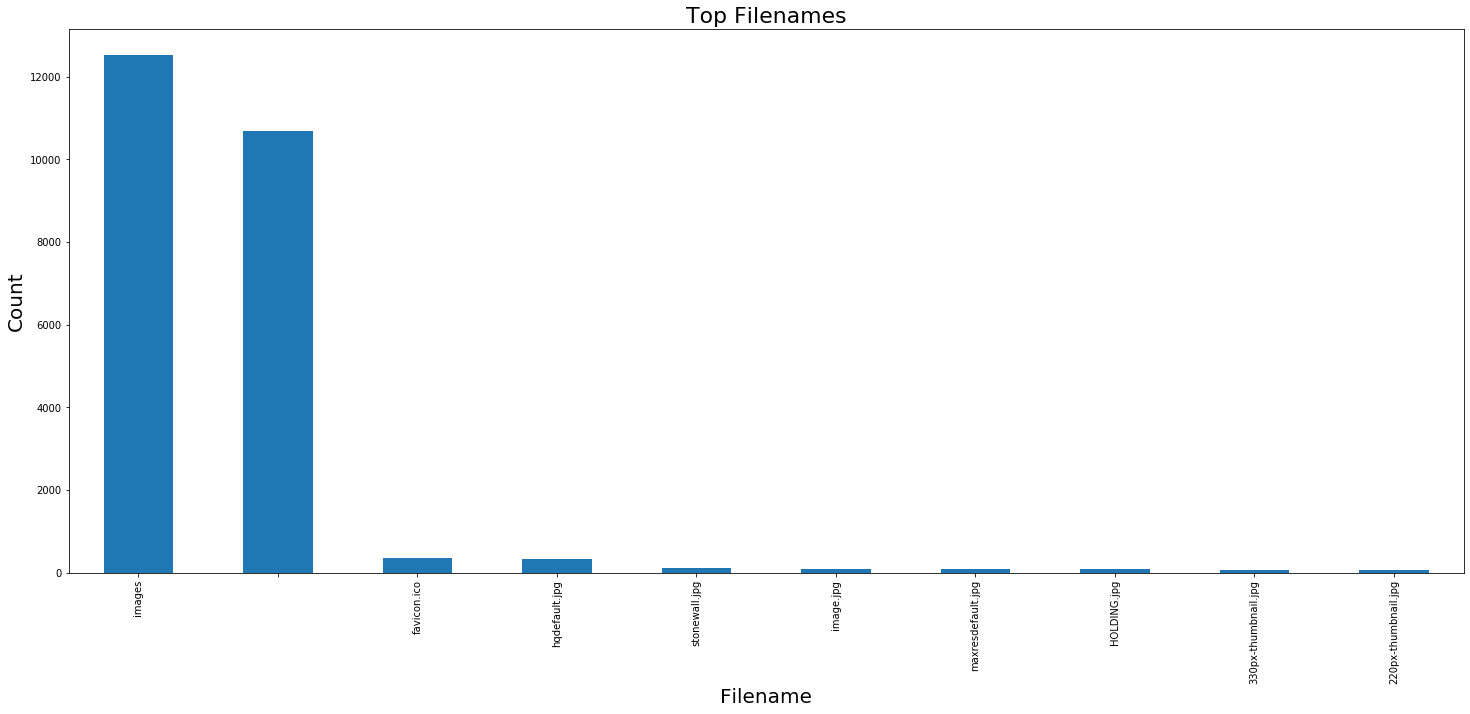

In [14]:
top_filenames_chart = top_filenames.plot.bar(figsize=(25,10))
top_filenames_chart.set_title("Top Filenames", fontsize=22)
top_filenames_chart.set_xlabel("Filename", fontsize=20)
top_filenames_chart.set_ylabel("Count", fontsize=20)

#### How about a MIME type distribution?

What _kind_ of image files are present? We can discover this by checking their "media type", or [MIME type](https://en.wikipedia.org/wiki/Media_type). 






Text(0, 0.5, 'Count')

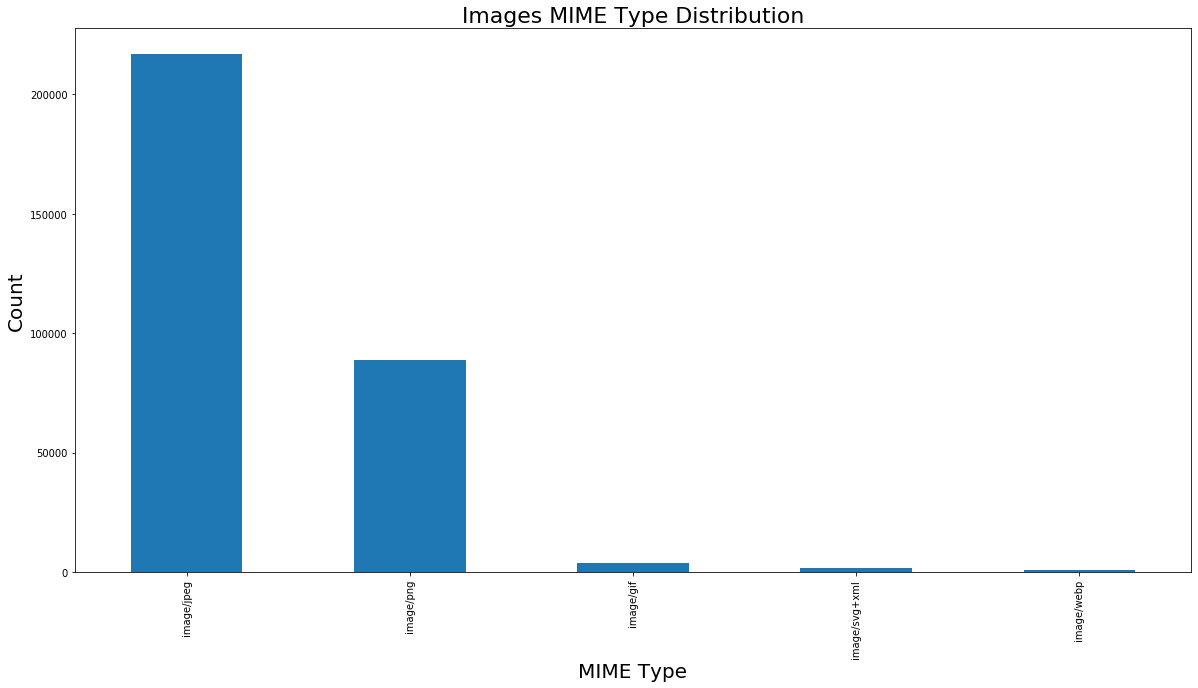

In [16]:
image_mime_types = images['mime_type_tika'].value_counts().head(5)
image_mime_type_chart = image_mime_types.plot.bar(figsize=(20,10))
image_mime_type_chart.set_title("Images MIME Type Distribution", fontsize=22)
image_mime_type_chart.set_xlabel("MIME Type", fontsize=20)
image_mime_type_chart.set_ylabel("Count", fontsize=20)

#### How about the distribution of the top 10 domains?

Here we can see which domains are the most frequent within the web archive.

Text(0, 0.5, 'Count')

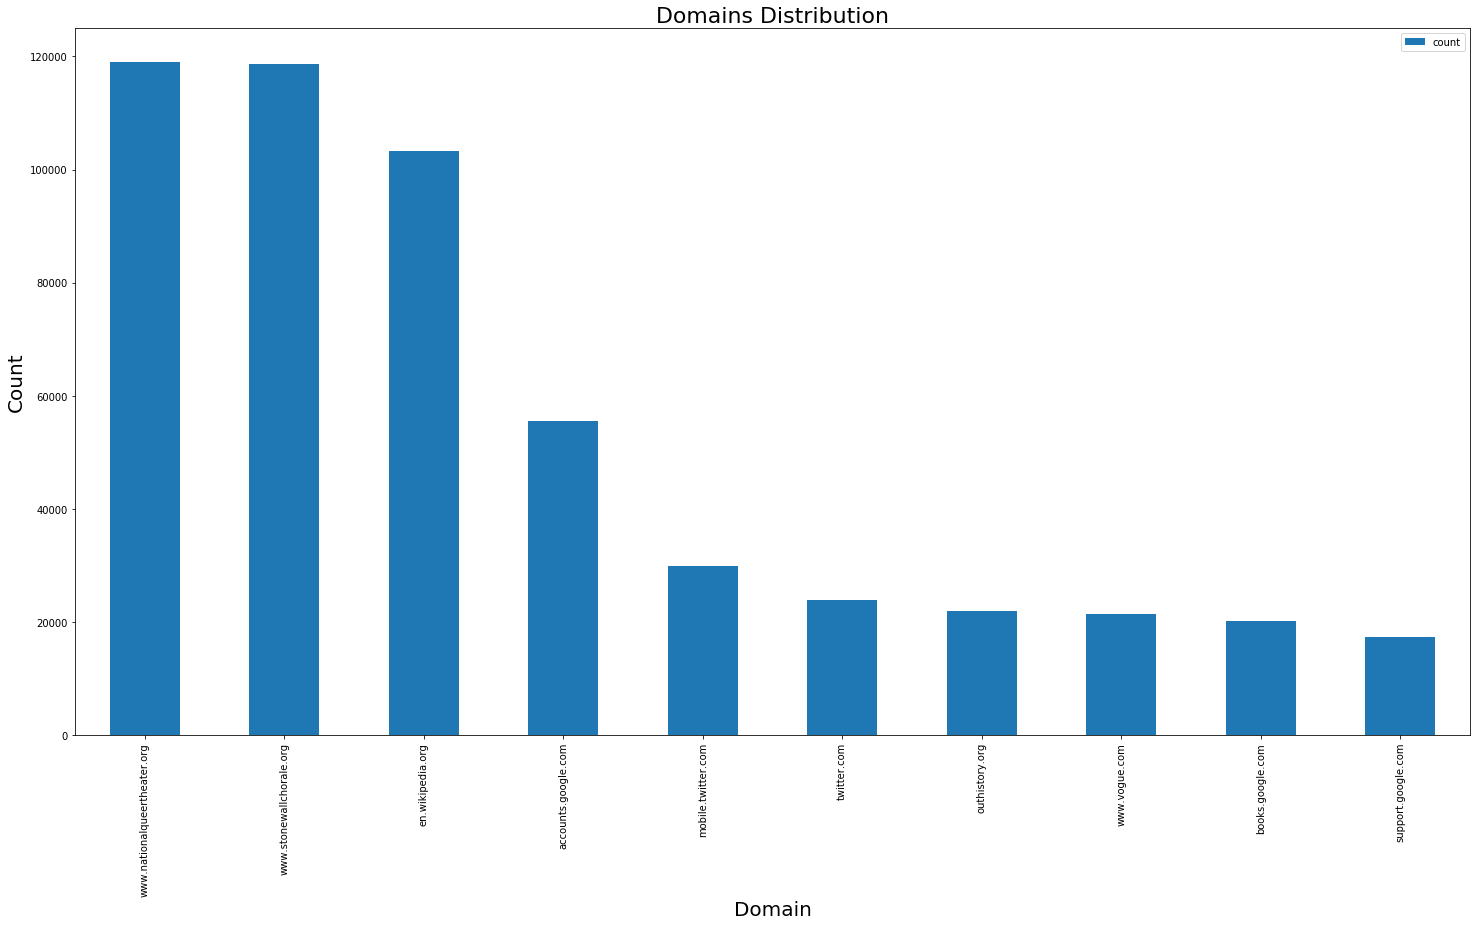

In [17]:
top_domains = domains.sort_values('count', ascending=False).head(10)
top_domains_chart = top_domains.plot.bar(x='url', y='count', figsize=(25,13))
top_domains_chart.set_title("Domains Distribution", fontsize=22)
top_domains_chart.set_xlabel("Domain", fontsize=20)
top_domains_chart.set_ylabel("Count", fontsize=20)

### Top Level Domain Analysis
Now let's create a new column, `tld`, which is based off an existing column, 'Domain'. This example should give you an idea of how you can expand these datasets to do further research and analysis. 

A [top-level domain](https://en.wikipedia.org/wiki/Top-level_domain) refers to the highest domain in an address - i.e. `.ca`, `.com`, `.org`, or yes, even `.pizza`.

Things get a bit complicated, however, in some national TLDs. While `qc.ca` (the domain for Quebec) isn't really a top-level domain, it has many of the features of one as people can directly register under it. Below, we'll use the command `suffix` to include this. 

> You can learn more about suffixes at https://publicsuffix.org.

We'll take the `Domain` column and extract the `tld` from it with [`tldextract`](https://github.com/john-kurkowski/tldextract).

First we'll add the [`tldextract`](https://github.com/john-kurkowski/tldextract) library to the notebook. Then, we'll create the new column.

In [0]:
%%capture

!pip install tldextract

In [20]:
import tldextract

domains['tld'] = domains.apply(lambda row: tldextract.extract(row.url).domain, axis=1)
domains

,url,count,tld
0,www.nationalqueertheater.org,119016,nationalqueertheater
1,www.stonewallchorale.org,118697,stonewallchorale
2,en.wikipedia.org,103231,wikipedia
3,accounts.google.com,55555,google
4,mobile.twitter.com,29955,twitter
...,...,...,...
3267,innonmainmanasquan.com,1,innonmainmanasquan
3268,nj.us.williamhill.com,1,williamhill
3269,ld-linux.so,1,ld-linux
3270,conradhotels3.hilton.com,1,hilton


#### Next, let's count the distict TLDs.


In [21]:
tld_count = domains['tld'].value_counts()
tld_count

wordpress             173
columbia              53 
google                39 
gettyimages           23 
yahoo                 22 
                      .. 
duaneparknyc          1  
worldairlineawards    1  
nurseslounge          1  
stonewallforever      1  
openingceremony       1  
Name: tld, Length: 2534, dtype: int64

#### Next, we'll plot the TLD count.


Text(0.5, 1.0, 'Top Level Domain Distribution')

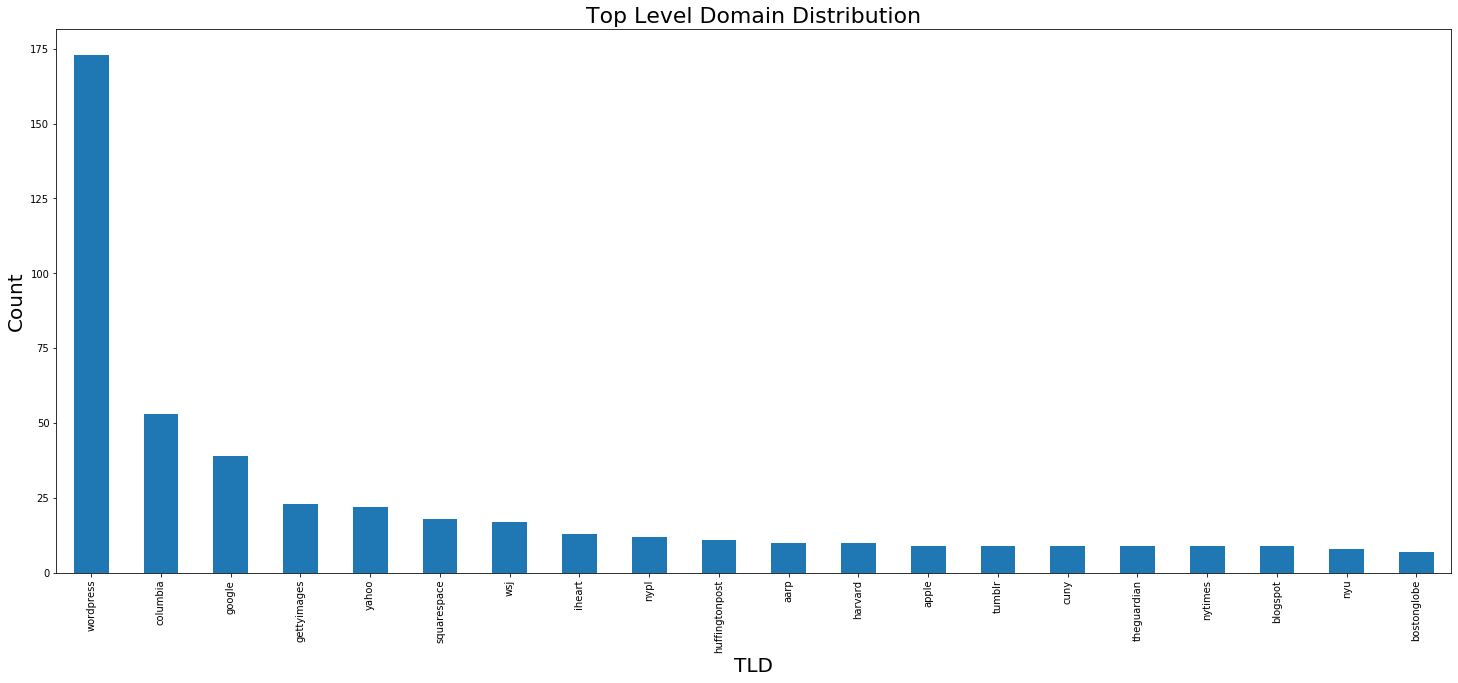

In [24]:
tld_chart = tld_count.head(20).plot.bar(legend=None, figsize=(25,10))
tld_chart.set_xlabel("TLD", fontsize=20)
tld_chart.set_ylabel("Count", fontsize=20)
tld_chart.set_title("Top Level Domain Distribution", fontsize=22)

## Examining the Web Graph

Remember the hyperlink web graph? Let's look at the web graph columns again.



In [25]:
webgraph

,crawl_date,src,dest,anchor
0,20190708,https://www.youtube.com/watch?v=4MSelbHNTK8&feature=youtu.be,https://www.google.com/intl/en/policies/privacy/,Privacy
1,20190708,https://www.youtube.com/watch?v=4MSelbHNTK8&feature=youtu.be,https://www.google.com/support/legal/answer/3110420,Legal Help page
2,20190708,https://accounts.google.com/ServiceLogin?uilel=3&service=youtube&continue=https%3A%2F%2Fwww.youtube.com%2Fsignin%3Ffeature%3Dpassive%26hl%3Den%26app%3Ddesktop%26next%3D%252Fsignin_passive%26action_handle_signin%3Dtrue&passive=true&hl=en,https://support.google.com/chrome/answer/6130773?hl=en,Learn more
3,20190708,https://accounts.google.com/ServiceLogin?uilel=3&service=youtube&continue=https%3A%2F%2Fwww.youtube.com%2Fsignin%3Ffeature%3Dpassive%26hl%3Den%26app%3Ddesktop%26next%3D%252Fsignin_passive%26action_handle_signin%3Dtrue&passive=true&hl=en,https://support.google.com/accounts?hl=en,Help
4,20190708,https://accounts.google.com/ServiceLogin?uilel=3&service=youtube&continue=https%3A%2F%2Fwww.youtube.com%2Fsignin%3Ffeature%3Dpassive%26hl%3Den%26app%3Ddesktop%26next%3D%252Fsignin_passive%26action_handle_signin%3Dtrue&passive=true&hl=en,https://accounts.google.com/TOS?loc=US&hl=en&privacy=true,Privacy
...,...,...,...,...
17518076,20190603,https://timessquares.nyc/stonewall50/search/%7Bsearch_term_string%7D/timessquares.nyc/timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/timessquares.nyc/timessquares.nyc,https://grsquares.org/,Grand River Squares (MI)
17518077,20190603,https://timessquares.nyc/stonewall50/search/%7Bsearch_term_string%7D/timessquares.nyc/timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/timessquares.nyc/timessquares.nyc,http://iagsdc.com/ottawa/,Ottawa Date Squares (Canada)
17518078,20190603,https://timessquares.nyc/stonewall50/search/%7Bsearch_term_string%7D/timessquares.nyc/timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/timessquares.nyc/timessquares.nyc,https://puddletownsquares.org/,Puddletown Squares (WA)
17518079,20190603,https://timessquares.nyc/stonewall50/search/%7Bsearch_term_string%7D/timessquares.nyc/timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/R0lGODlhAQABAIAAAAAAAP///timessquares.nyc/timessquares.nyc/timessquares.nyc,http://www.chesapeakesquares.org/,Chesapeake Squares (MD)


### What are the most frequent crawl dates?


Text(0.5, 1.0, 'Crawl Date Frequency')

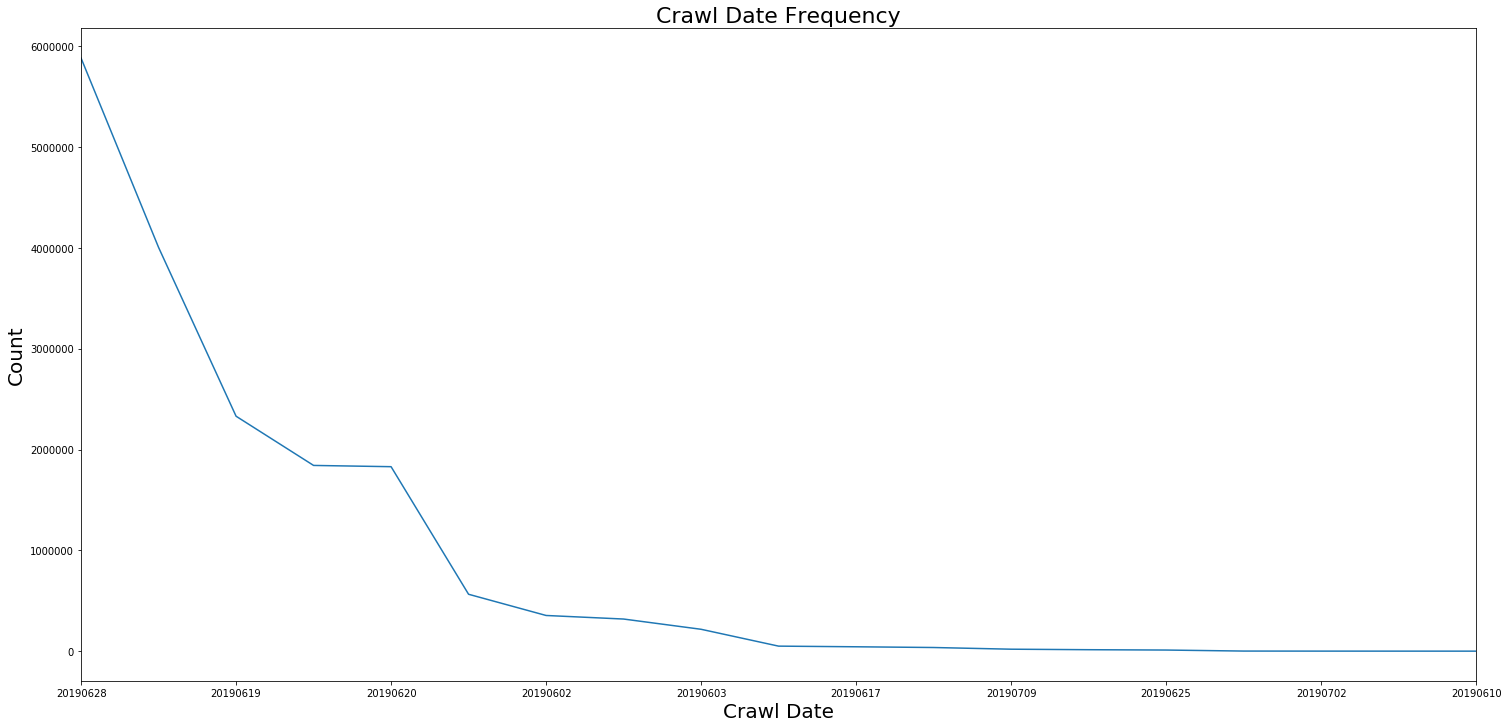

In [26]:
crawl_dates = webgraph['crawl_date'].value_counts()
crawl_dates
crawl_dates_chart = crawl_dates.plot.line(figsize=(25,12))
crawl_dates_chart.set_xlabel("Crawl Date", fontsize=20)
crawl_dates_chart.set_ylabel("Count", fontsize=20)
crawl_dates_chart.set_title("Crawl Date Frequency", fontsize=22)
